In [ ]:
from ucimlrepo import fetch_ucirepo
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables

In [2]:
from pydoc import help 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargamos los datos  
datos = pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")
datos.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
#Seleccionamos las cuantitativas
cuanti=datos.select_dtypes(np.number)
covarianza=cuanti.cov()
corre=cuanti.corr()

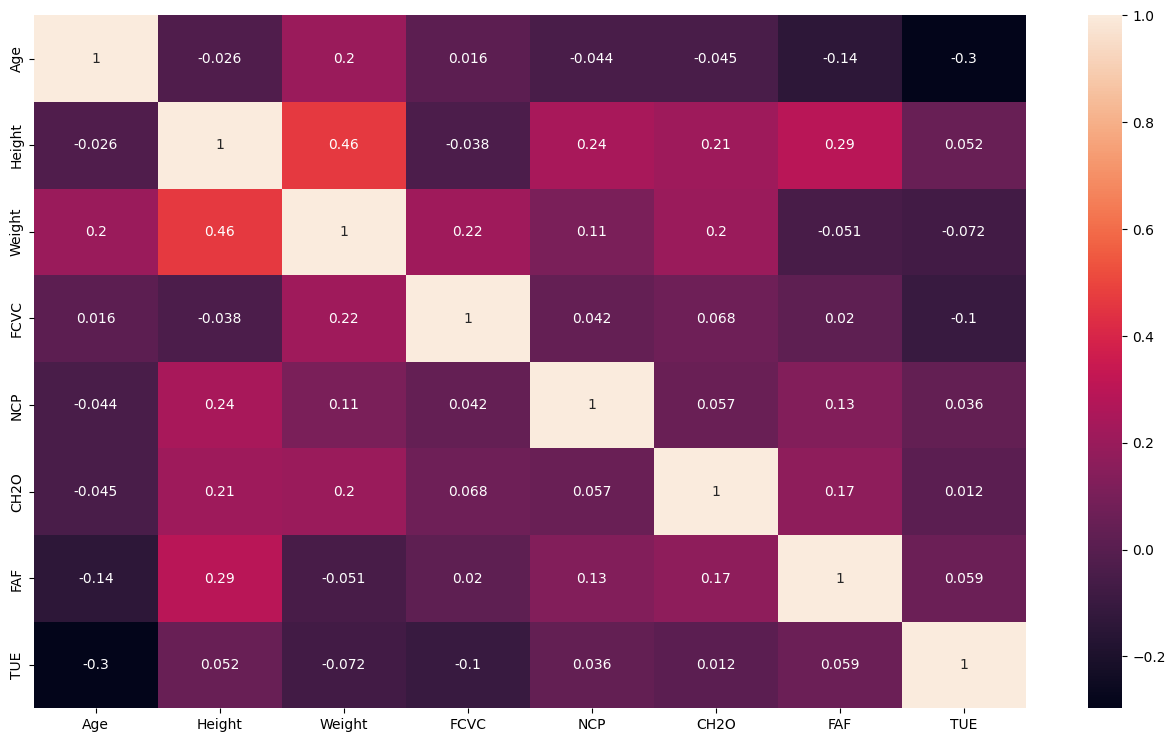

In [5]:
sns.heatmap(corre, annot = True)
plt.show()

In [6]:
escala=StandardScaler()
escala.fit(cuanti)
CuantiScale=escala.transform(cuanti)
CuantiScale.shape

(2111, 8)

In [17]:
#Creamos un objeto PCA y aplicamos
pca=PCA(n_components=4) # Otra opcion pca=PCA(.85)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [18]:
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:6]))

Ajuste de PCA (2111, 8)
[0.22648604 0.18657893 0.12645386 0.11886405]
suma: 0.6583828860495295


In [19]:
pca.components_

array([[-0.00759208, -0.59807749, -0.50366086, -0.16196797, -0.33312341,
        -0.38465497, -0.32123642, -0.0146391 ],
       [ 0.60380242, -0.07029488,  0.36177851,  0.2601867 , -0.12777839,
        -0.0529933 , -0.36164717, -0.53101429],
       [ 0.33842822,  0.29822751,  0.01121127, -0.83080707,  0.18585624,
        -0.26063746, -0.04050135, -0.04523084],
       [ 0.13433682, -0.08281009, -0.39859007, -0.06263861, -0.06800734,
         0.21451928,  0.64782898, -0.5847842 ]])

<Axes: >

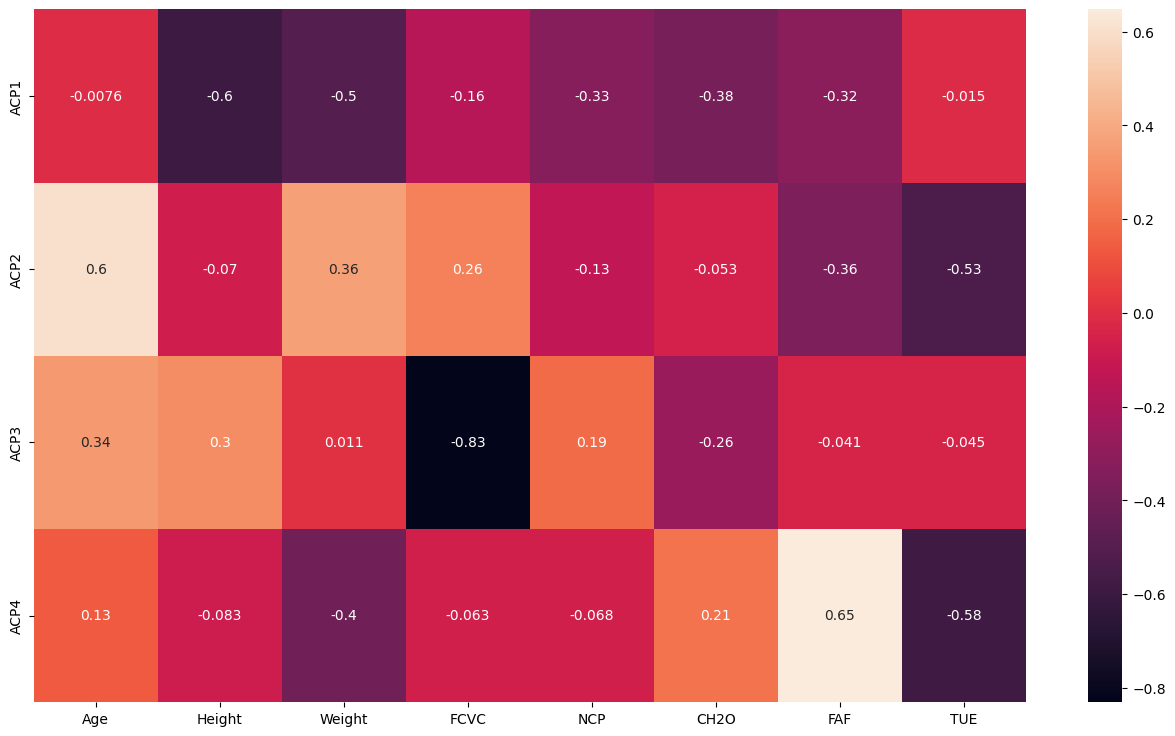

In [20]:
ACP=[]
for i in range(0, len(pca.components_)):
  x=["ACP", str(i+1)]
  a="".join(x)
  ACP.append(a)
sns.heatmap(pca.components_,xticklabels=cuanti.columns, yticklabels=ACP, annot=True)

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22648604, 0.41306498, 0.53951884, 0.65838289])

In [27]:
print(pca.explained_variance_ratio_)
a=len(pca.components_)+1
y=range(1,a)
fig=px.line(x=y, y=np.cumsum(pca.explained_variance_ratio_))
fig.show()

[0.22648604 0.18657893 0.12645386 0.11886405]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed